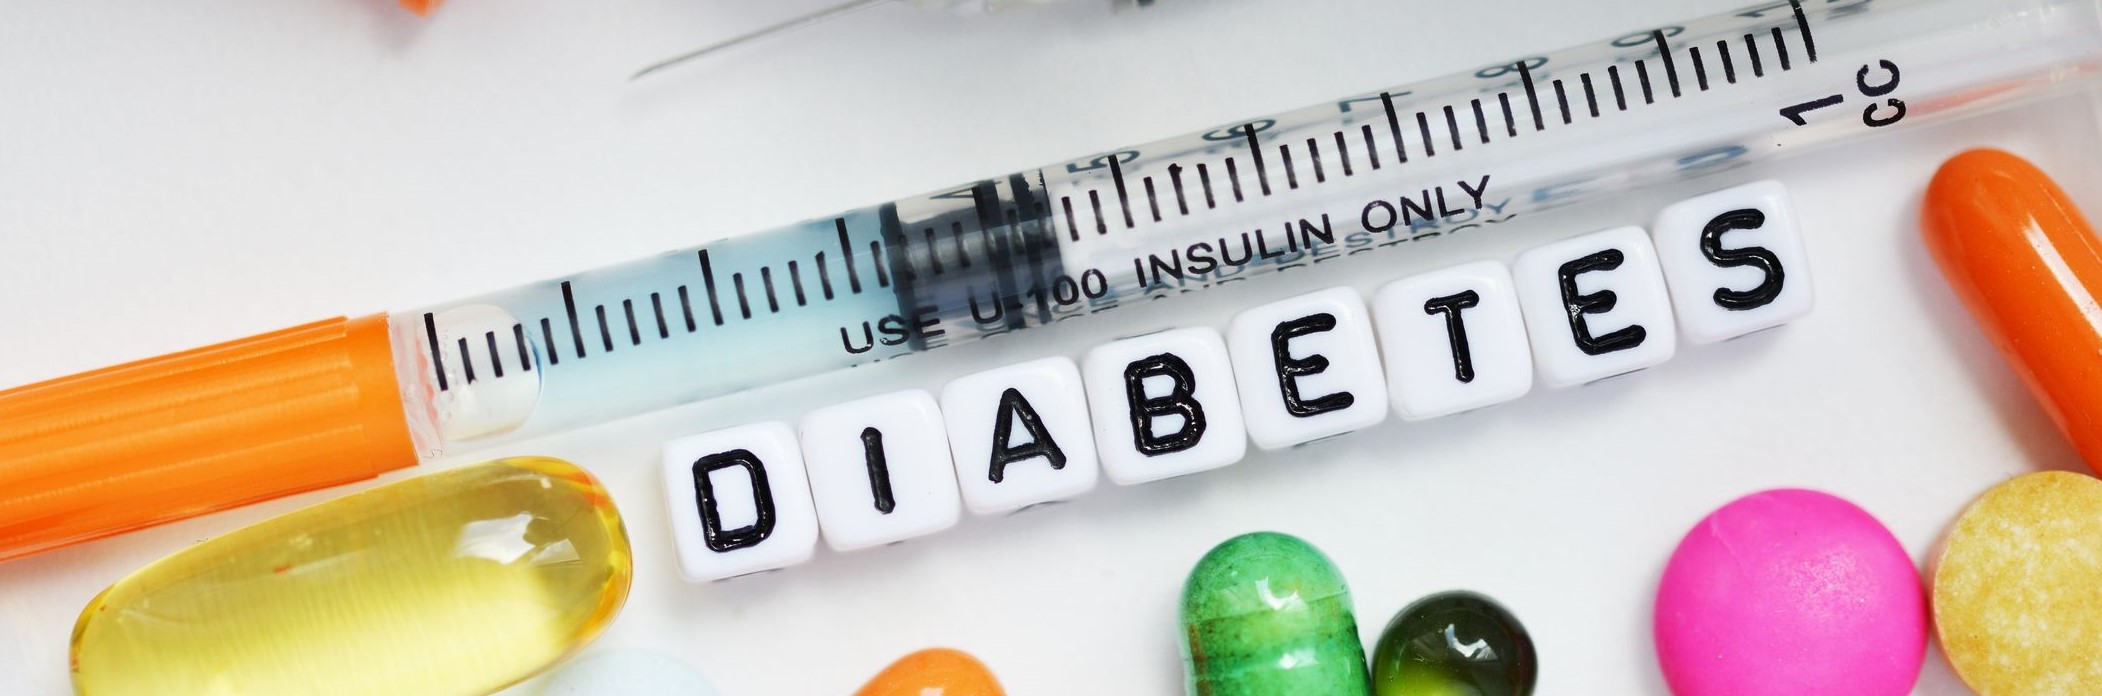
# What is Diabetes? Why is it important?  


Do you feel tired and exhausted after eating? This can be caused by factors like either when and what you eat, the hormones in those foods and the quality of food or It can be a symptom or sign of diabetes because of increasing blood sugar in your body. 

There are too many people that are diabetic in our environment. 
Do you know how to become a diabetic candidate?  Actually, some of us know the answer. Stress, lifestyle, eating habits, genetics and lots of influential factors trigger diabetes. Alright, What is diabetes and how to deal with it? Let's examine diabetes in detail.


Diabetes is a common(long-time hunger) health condition that influences how your body turns food into energy. Your body separates most of the food that you eat into sugar and unleashes it into your bloodstream. When your blood sugar increases, it signals your pancreas to warn about insulin. Insulin works as an important key to allowing blood sugar into your body’s cells for use as energy. This situation is different in a diabetic person. Your body doesn't release enough insulin with diabetes, or your body can't utilize it as desired.  When there isn’t enough insulin, too much blood sugar remains in your bloodstream.  Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.

As known, there are 2 types of diabetes. Type 1 diabetes is innate and also is a genetic condition that often shows early in life.  Type 2 diabetes is not innate and also mainly lifestyle-related and grows over time. Type 1 diabetes treatment is insulin injection that is necessary to use. However, people that have type 2 diabetes need to focus on healthy eating. 



In this notebook, we focus on people with diabetes. We examine the effect of diabetes on our bodies. 

# Importing Libraries

Before starting the project, we need to import important libraries.  There are functions that are available in these libraries. We can work or analyze the data with these functions easily.

In [ ]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

# Data Information

In this section, we obtain information about data such as data type, data shape, null values,  and duplicated values. 

**Reading Data**

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

In [ ]:
df.head(5)

We can see that there are 9 different features in the data frame.

**Information about features**

**Pregnancies**: To express the number of pregnancies

**Glucose**: To express the Glucose level in blood

**BloodPressure**: To express the Blood pressure measurement

**SkinThickness**: To express the thickness of the skin

**Insulin**: To express the Insulin level in blood

**BMI**: To express the Body mass index

**DiabetesPedigreeFunction**: To express the Diabetes percentage

**Age**: To express the age

**Outcome**: To express the final result 1 is Yes and 0 is No

In [ ]:
df.shape

Data have 768 rows and 9 columns

The outcome shows the diabetic person or non-diabetic person number as a binary representation. In below the code snippet, we can see that the non-diabetic person's number is 500 and the diabetic person's number is 268. There are huge differences between the two outcomes. This result shows us that we have imbalanced data.

In [ ]:
df['Outcome'].value_counts().unique

**Controlling null values**

In [ ]:
df.isnull().sum()

There isn't null value in the data

**Checking Duplicated Values**

In [ ]:
df.duplicated().sum()

There isn't duplicated value in the data

**Statistical Information**

Using 'describe' function, we can clearly see that minimin, maximum, mean, standard deviation and other statistical functions help to understand the data.

In [ ]:
df.describe()

# Exloratory Data Analysis

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Pregnancies'])


The most number of pregnancies is 1. In other words, 135 person has one pregnancy. 0 pregnancy follows the 1. 111 person has no pregnancy. Also, when the number of pregnancies increases,  this proportion decreases.

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df['Glucose'])
df['Glucose'].value_counts().unique

Generally, the amount of Glucose in the blood should be between 70 and 99 mg/dl. The higher ranges indicate pre-diabetes or diabetes. In the above figure, 17 persons have a value of 99 glucose.  17 and 14 persons have the value of 100 and 111 glucose respectively.  The most of values are higher than the normal range.

**Does Pregnancy cause an increase in blood Glucose?**

In [ ]:
df.groupby('Pregnancies')[['Glucose']].mean().plot(figsize = (10,5), marker = '^', color = 'b')

In the above graph, Pregnancies and Glucose have a close relationship.

**Blood Presure**

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df['BloodPressure'])

The range of blood pressure should be between 80 and 120 mmHg. In our graph, the distribution of blood pressure is between 60 and 80. The mean blood pressure is 69.105.

**Is the increase in Blood Pressure directly proportional to Glucose?**

In [ ]:
fig_dims = (12, 4)
pyplot.hist(df['Glucose'], 20, alpha=0.5, label='Glucose')
pyplot.hist(df['BloodPressure'], 20, alpha=0.5, label='BloodPressure')
pyplot.legend(loc='upper right')
pyplot.xlabel('Glucose and Blood Pressure ')
pyplot.show()

We group the data using 20 bins in order to see the result obviously. In the above graphic, there is no relationship between Glucose and Blood Pressure. Blood Pressure is not affected by Glucose. 

**Skin Thickness**

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df['SkinThickness'],color='pink')

The figure shows the range of skin thickness levels. 
According to research,  the mean skin thickness level should be 2 mm. In our graphic, most people have a '0' skin thickness. '0' level of skin thickness is an impossible and unrealistic result. We will analyze this problem in later sections.

In [ ]:
print("Total : ", df[df.SkinThickness == 0].shape[0])

**Does Glucose affect the Skin Thickness?**

In [ ]:
df.plot.scatter(x = 'Glucose', y = 'SkinThickness', s = 'SkinThickness', c = 'blue')

Skin thickness is not influenced by glucose level. When glucose level increases, skin thickness does not increase.

**Insulin**

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df['Insulin'],color='red')

In [ ]:
df['Insulin'].max()

In [ ]:
df[df['Insulin']==0].shape[0]

In the above graphic, the value of Insulin is between 0 and 846. Most people have zero insulin levels. With type 1 diabetes, beta cells produce little or no insulin.  We can say obviously that 374 persons have type 1 diabetes. Approximately 5-10% of the people who have diabetes have type 1. People who have type 1 diabetes are very rare. For our dataset, this proportion is 45.18% for type 1 diabetes.  We can say that data for Insulin values have invalid samples.

**Does Glucose increase when Insulin increases?**

In [ ]:
df1=df[df['Glucose']>99]
df1=df1[df1['Insulin']>0]
x=df1.groupby('Glucose')[['Insulin']].max()
fig=px.line(x,x=x.index,y='Insulin',title='Insulin and Glucose',markers=True)
fig.show()

In diabetes, the amount of Glucose is higher than 99 mg. We limit the glucose value higher than 99 mg in order to see the result of affecting insulin. In the figure, glucose and insulin have a positive relationship but in some situations, insulin doesn't respond to the glucose and the value of insulin can be higher than the glucose amount. This problem is called 'Insulin Resistance'. Insulin resistance is when cells in your muscles, fat, and liver don’t respond well to insulin and can’t easily take up glucose from your blood. As a result, your pancreas makes more insulin to help glucose enter your cells.

**BMI (Body Mass Index)**

****

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df['BMI'],color='orange')

1.  BMI of 18.49 or below means a person is underweight
2.  BMI of 18.5–24.99 means they are of normal weight
3.  BMI of 25–29.99 means they are overweight
4.  BMI of 30–39.99 or more means they are obese
5.  BMI of 40 or more means they are morbidly obese

In the above figure, the distribution of the BMI is between 20 and 50.

**BMI versus Insulin and Glucose**

In [ ]:
df1=df[df['BMI']>25]
df1=df1[df1['Glucose']>99]
df1=df1[df1['Insulin']>0]
fig=plt.figure(figsize=(14,4))
fig = plt.subplot(121)
plt.scatter(df1['BMI'], df1['Insulin'],s=10, c='b', marker="s", label='Insulin')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.title('')
fig = plt.subplot(122)
plt.scatter(df1['BMI'],df1['Glucose'], s=10, c='r', marker="o", label='Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')

Left figure shows scatter plot that gives information about Insulin and BMI. We can see that a higher BMI is associated with decreased insulin sensivity.

Right figure shows the relationship between Glucose and BMI. Glucose and BMI have positively correlated.Thus, the risk of  overweighted and obesity is connected with this conditions.

**Skin Thickness Vs Insulin**

In [ ]:
df1=df[df['SkinThickness']>30]
df1=df1[df1['Glucose']>60]
df1=df1[df1['Insulin']>0]
fig=plt.figure(figsize=(14,4))

plt.scatter(df1['SkinThickness'], df1['Insulin'],s=10, c='b', marker="s", label='Insulin')
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')



Normally, when insulin increase, skin thickness is increased in insulin-dependent diabetes. However, in the figure, Skin thickness is not really affected by insulin. This result shows that skin thickness values reflect invalid results to compare or analyse data.

**Diabetes Pedigre Function**

**Diabets Pedigree Function** is a function that determines the risk of type 1 diabetes based on family history, the larger the function, the higher the risk of type 1 diabetes. The below figure shows the distribution of diabetes pedigree function. The mean of the function is 0.471 and standart deviation is 0.33

In [ ]:
mu, std = norm.fit(df['DiabetesPedigreeFunction'])
plt.figure(figsize = [12, 6])
sns.distplot(df['DiabetesPedigreeFunction'], hist=True, kde=True, 
             bins=25, color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Result : $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Diabetes Pedigree Function", size=15)
plt.ylabel("Density", size=15);

**Diabetes Pedigree Function vs Insulin**

In [ ]:
df.groupby("Outcome").agg({"DiabetesPedigreeFunction":[np.mean, np.std, np.size]})

In [ ]:
from ggplot import *

In [ ]:
#ggplot(df, aes(y="DiabetesPedigreeFunction", x="Outcome"))+ geom_jitter()+ theme_bw() + xlab("Outcome") + ylab("DiabetesPedigreeFunction") 
ggplot(df,  aes(x="Outcome",y="DiabetesPedigreeFunction",fill="DiabetesPedigreeFunction"))+geom_boxplot()  + xlab("Outcome") + ylab("DiabetesPedigreeFunction")  

The above figure, '0'indicates that is no diabetes person. '1' indicates a diabetes person.  Usually, when the value of diabetes pedigree increases, the number of diabetes increases. However,  we are surprised that the figure gives us not a clear result. Also, lots of noise is available in the figure.

**Insulin vs Age**

In [ ]:
plt.figure(figsize=(10,6))
df1=df[df['Insulin']>0]
plt.scatter(df1.Age[df1.Outcome==0],df1.Insulin[df1.Outcome==0],c="lightblue");
plt.scatter(df1.Age[df1.Outcome==1],df1.Insulin[df1.Outcome==1],c="blue");
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.legend(['No Diabetes','Diabetes'])
plt.title('The Effect of Age on Insulin')

The figure shows that insulin value changes based on age. Light blue circles indicate no diabetic persons. Blue circles show a diabetic person. when we analyze the figure clearly, the range of 20 and 30 ages has diabetic persons intensely. There is no specific relationship between age and insulin.  At this point, food, life situations, and stress can be affected or trigger the insulin range.  

In [ ]:
df1.groupby("Outcome").agg({"Age":[np.mean,np.size],"Insulin":[np.max,np.min,np.mean]})

 We analyze the data shortly using maximum, minimum and mean functions in order to better understand the figure. The total person is 394. 264 person is not diabetic. 130 person is diabetic. The mean age for diabetic persons is 35.93. Also, the maximum insulin value is 846. 
 We notice that the non-diabetic person has a 744 insulin value.  This result provides a problem. Does high insulin trigger diabetes for non-diabetic person? 

# Data Cleaning

In this section, we will clean our data before classification in order to decrease unnecessary values or noises. 
First section, we analyzed  null and duplicates values.We saw that there isn't duplicated or null values. However,  when we visulazed the data, we noticed that blood pressure, glucose, skin thickness, BMI and Insulin have 0 values. 

**Blood Pressure :** As analyzed the data, we found that some values  doesn't show correct results.  Because a person who living can't have a blood pressure of zero.  We can see 35 persons who have  '0' blood pressure by observing the data. 35 persons shows unrealistic values.

In [ ]:
df[df.BloodPressure == 0].shape[0]

In [ ]:
df[df.BloodPressure == 0].groupby('Outcome')['BloodPressure'].count()

**Glucose:** When we visualized the data, we saw that there are zero glucose values. Even if you stay hungry for a long time, your glucose level would not be as low as zero. Scientifically, this situation is impossible. Therefore, zero is an invalid for glucose level.  By analyzing the data we can see 5 persons that have the value  0.

In [ ]:
df[df.Glucose == 0].shape[0]

In [ ]:
df[df.Glucose == 0].groupby('Outcome')['Glucose'].count()

**BMI:** BMI is a measure of body fat based on height and weight that applies to adult men and women. This value should not be 0 or close to zero,  even if the person is really underweight. Otherwise, this situation could threaten the person's life.

In [ ]:
df[df.BMI == 0].shape[0]

In [ ]:
df[df.BMI == 0].groupby('Outcome')['BMI'].count()

**Skin Fold Thickness:** For normal people, the thickness of skin varies from 0.5mm thick on the eyelids to 4.0mm thick on the heels of your feet. Skin thickness can't be less than 4 mm. However, in our data we have 227 people that have 0 skin thickness.

In [ ]:
df[df.SkinThickness == 0].shape[0]

In [ ]:
df[df.SkinThickness == 0].groupby('Outcome')['SkinThickness'].count()

**Insulin**:  a person that have zero insulin is rare condition in real life. This situation can be genetic disorder or family based problem. However,  when we analyze the data, we can find 374 people that have zero insulin. 

In [ ]:
df[df.Insulin == 0].shape[0]

In [ ]:
df[df.Insulin == 0].groupby('Outcome')['Insulin'].count()

**We can follow 3 ways to avoid invalid values :**

**1)** We can remove the zero values from the data. But this isn't achievable in most cases because that can indicate losing valuable information. In our cases, insulin and skin thickness columns have lots of invalid variables. However, it may work for glucose, BMI and blood pressure columns. 

**2)** Instead of zero values, we can change with the mean values. However, in our situation, changing a mean value to a blood pressure column would dispatch the wrong information to the model. The model can give better or worst results in classification.

**3)**  For the classification model, we may not use features that have a lot of invalid values. The skin thickness column has many invalid values. This idea works for that column but it is difficult to predict that feature.

At the end of the data cleaning process, we will move with some minor adjustments to not change the original data.

We will remove the zeros rows from the blood pressure, BMI and Glucose columns

In [ ]:
df = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
df.shape


# Preprocessing

For classification, we need to divide it into 2 pieces class names and samples.  The 'Outcome' column shows the Person who is diabetic (1) or not (0). Also, we can say that our classification is binary classification.

In [ ]:
y=df['Outcome']
X = df.drop('Outcome',axis=1)

We need to normalize our samples in order to group similar values into one common value, bringing greater context.

**Normalization**

Using z-normalization in order to scale the values. All values would be same range after normalization.

In [ ]:
def normalize(x):

  z=(x-x.mean())/x.std()

  return z

In [ ]:
X=normalize(X)

After normalization, variation should be 1 and standart variation 0.

In [ ]:
print('Variation of data is ', X.var())

**Correlation Matrix**


Correlation declares how the features are related to each other or the target variable. Correlation can be positive or negative. Heatmap makes it easy to identify which features are most related to the target variable.

In [ ]:

cormat=pd.concat([X, y], axis=1)
corr=cormat.corr().round(2)
fig=plt.figure(figsize=(10,10))
fig=sns.heatmap(corr,annot=True,cmap='Accent')

In the heatmap, we can see clearly that Insulin and Blood Pressure have a negative relationship.  Diabetes Pedigree Function and Blood Pressure have no relation between them. Age and Pregrancies have a positive relationship.BMI has a positive relationship with all features. 

# Train / Test Split

We split the data into two sets that are training and testing sets. Training set is used for training model. 
Testing set is used for test model that evaluates the  accuracy.
We split the data into the proportion of 80% train and 20% test. We used the train_test_split of the sci-kit learn method for this task.

In [ ]:
#split train and test data x_train=train data,x_test=test data, y_train=train labels, y_test=test_labels 
#%20 test %80 train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=df.Outcome,random_state=100)

# Classification

We used 8 different classification models. These are K-Neighboors, Support Vector Machine, Logistic Regression, Decision Tree, Naive Bayes, Random Forest  Gradient Boosting and Extreme Gradient Boosting algorithms. In all classification models, we used default setting parameters. However, we focus on the algorithms that have higher classification accuracy in order to improve the results. Therefore, we used the hyperparameter tuning technic. In this way,  we increase the classification results.  

First of all, we create an array for taking each classification model and add these models to array.

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))


Then, we train each model with our samples and predict these samples with our testing samples. As a result, predicting results are shown by accuracy score.

In [ ]:
names = []
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))
    names.append(name)    
tr_split = pd.DataFrame({'Name': names, 'Result': results})
print(tr_split)

The name column shows the classification model name, and the result column shows the percentage of predicted results. When we examined the result, we saw that Linear Regression,Support Vector Machine and Extreme Boosting algorithms gives better result compared with others. Although we can't use higher parameter tuning, the results are incredibly high. Actually, we need to analyze each model's confusion matrix. Because our data is imbalanced. There are 3 different technics that are used for imbalanced data. These technics are over sampling, under sampling and SMOTE method. If you want to change the data, you can use one of them. However, we cannot change the real dataset and we only focus on the XGBoosting, Logistic Regression and SVM algorithms and how to determine hyperparameters.

# Hyper-parameter Tuning 

**Support Vector Machine**

SVM is  widespread algorithm that is used for both classification and regression problems. It  utilize a technic that is called kernel method to change data and  based on these changes finds the perfect boundary between the possible results.

In SVM, kernel tricks are important role for classification. There are four types of kernels. These are radial basis (rbf), polynomial(poly), sigmoid and linear kernel tricks. 

C is the penalty parameter that controls the balance between decision boundary and classifying the training points correctly.

Degree is a parameter that is used when kernel is selected to ‘poly’. It  is used to find the hyperplane to separate the data.

Firstly, we need to determine the parameters' values for the model.  Then, the best parameters are selected by the grid search algorithm and using these parameters, the model is trained. 

In [ ]:
parameters = { 'C':[0.1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(),parameters)
grid_Result=grid.fit(X_train,y_train)

best_params_ function helps us to see which parameters are used in our model. We can see that C:0.1 degree:1 and kernel: linear are ideal for classification to give high results.

In [ ]:
grid.best_params_

After the training model, we can predict the test samples and performance.

In [ ]:
pred_y_test = grid_Result.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, pred_y_test))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, pred_y_test))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, pred_y_test))
print('')
print('Classification Accuracy')
print('-------------------------------------------------------')
print(accuracy_score(y_test, pred_y_test))

Using good parameters, classification accuracy increased by approximately 0.69. 

**Logistic Regression**

Logistic Regression is used for classification where the response variable is categorical rather than numerical. In logistic regression, there are some known parameters. Now, when we look at these parameters in detail, 

Regularization is a technique that is used for preventing underfitting and overfitting problems. In other words,  It is the key to determining the sweet spot between under and overfitting. The model uses 3 different norms for regularization. These are 'L1'(Lasso), 'L2'(Ridge), 'elasticnet'(Lasso+Ridge) regularization.

C is the regularization parameter.   When we use the small value of C, the regularization strength increases which means that we create simple models which underfit the data. 
When we use the larger value of C,  the regularization strength decreases and the model is allowed to increase its complexity. Therefore, data overfit.

max_iter means that the maximum number of iterations taken for the solvers to converge.

solver: the algorithm uses in the optimization problem. Also, the algorithm provides options to choose a solver algorithm for optimization. Usually, the default solver works great in most situations and the algorithm presents many options for specific occasions such as large data.

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
     'C' : [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000],
    'solver' : ['lbfgs','newton-cg','newton-cholesky','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
log_grid = GridSearchCV(LogisticRegression(), param_grid = param_grid , verbose=0, n_jobs=-1)
log_result=log_grid.fit(X_train,y_train)

In [ ]:
log_grid.best_params_

In [ ]:
pred_y_test = log_result.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, pred_y_test))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, pred_y_test))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, pred_y_test))
print('')
print('Classification Accuracy')
print('-------------------------------------------------------')
print(accuracy_score(y_test, pred_y_test))

When we compared both Linear Regression classification accuracy (default and hype-parameter), we can see that these two results are the same (%78.6). 

**XGBoost**

XGBoost is an optimized distributed gradient boosting library that is designed for efficient, flexible and portable. It implements machine-learning algorithms under the Gradient Boosting structure. There are many hyperparameters that are used in this algorithm. These are : 

**max_depth:** The maximum depth per tree. A deeper tree might increase the performance, but also the complexity and chances to overfit.
The value must be an integer greater than 0. The default is 6.

**learning_rate:** The learning rate determines the step size at each iteration while your model optimizes toward its objective. A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum. The value must be between 0 and 1. Default is 0.3.

**n_estimators:** The number of trees in our ensemble. Equivalent to the number of boosting rounds.The value must be an integer greater than 0. Default is 100.

**alpha (reg_alpha):** L1 regularization on the weights (Lasso Regression). When working with a large number of features, it might improve speed performances. It can be any integer. Default is 0.

**gamma:** Gamma is a pseudo-regularisation parameter (Lagrangian multiplier), and depends on the other parameters. The higher Gamma is, the higher the regularization. It can be any integer. Default is 0.

For more information, you can read [3] in the section of the reference.

In [ ]:
pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', XGBClassifier())
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [100, 200, 1000],
    'model__learning_rate': [0.01,0.05,0.1],
    'model__gamma': [0, 0.5, 1],
    'model__reg_alpha': [0, 0.5, 1],
    'model__eval_metric': ['mlogloss']
}


In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
pred_y_test = grid.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, pred_y_test))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, pred_y_test))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, pred_y_test))
print('')
print('Classification Accuracy')
print('-------------------------------------------------------')
print(f'{accuracy_score( pred_y_test,y_test):.3f}')

Hyperparameters are a crucial role because they directly influence the behaviour of the training algorithm and have a notable impact on the performance of the model. In the XGBoost model, hyperparameters have a negative effect on the classification accuracy compared to the 2 different classification models.  Actually,  we can see that these hyperparameters are not suitable for our algorithm.  We can change parameters to find the optimal result. However, that takes too much time for training. 

# Conclusion

In this notebook :
* Analyzing the diabetes dataset
* Visualizing the data.
* Examining the unexpected features and replaces with zero values. 
* Splitting data proportion of %80 train and %20 test
* Using 8 different machine learning algorithms. 
* Applying hyper-parameters to only 3 algorithms that are selected.

We can say clearly that: 

* Dataset is imbalanced and it has some features that include non-real values.
* Some factors can be trigged to be diabetics such as BMI. 
* Linear regression has the best result to classify diabetics compared to other algorithms.


***Remember that healthy eating, sport, away from stress, and quality of life change both your body and your health.
Be kind to yourself and stay healthy. There is only one DNA in the world that belongs to you ♡***

Thank you for your time 

# References


**Diabetes Information :**

[1] https://www.healthline.com/health/difference-between-type-1-and-type-2-diabetes#causes

[2]  https://www.netdoctor.co.uk/conditions/diabetes/a826/diabetes-overview/ 

[3] https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

